In [3]:
import os
import numpy as np
# import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [11]:
DATA_DIR = "../data"
TRAIN_DIR = os.path.join(DATA_DIR,"train")
TEST_DIR = os.path.join(DATA_DIR,"test")

def generate_new_dir(train_dir, classes):
    train_set = os.listdir(train_dir)
    random.shuffle(train_set)
    new_train_dir = train_dir + "_2"

    if not os.path.exists(new_train_dir):
        os.mkdir(new_train_dir)
    
    for fname in train_set:
        for label in classes:
            if fname.startswith(label):
                if not os.path.exists(os.path.join(new_train_dir,label)):
                    os.mkdir(os.path.join(new_train_dir, label))
                os.link(os.path.join(train_dir,fname), os.path.join(new_train_dir, label, fname))
                break
    
    print("Finished generate symbol link for all images")
    return new_train_dir

In [7]:
NEW_TRAIN_DIR = generate_new_dir(TRAIN_DIR, ['dog','cat'])

Finished generate symbol link for all images


In [9]:
def analysis_dataset(train_dir):
    classes = os.listdir(train_dir)
    width_info = []
    height_info = []
    count_info = []
    for c in classes:
        img_set = os.listdir(os.path.join(train_dir, c))
        count_info.append(len(img_set))
        for fname in img_set:
            img = Image.open(os.path.join(train_dir, c, fname))
            width_info.append(img.size[0])
            height_info.append(img.size[1])
            
    return classes,count_info, width_info, height_info

def draw_dataset(classes, count_info, width_info, height_info):
    
    plt.bar(np.arange(len(count_info)), count_info)
    plt.xlabel("Category")
    plt.xticks(np.arange(len(classes)), classes)
    plt.ylabel("Sample count")
    plt.title("Dataset classes count")
    plt.show()
    
    plt.scatter(width_info, height_info)
    plt.xlabel("width")
    plt.ylabel("height")
    plt.title("Dataset width-height scatter distribution")
    plt.show()
    
def look_dataset(train_dir, square=5):
    random.seed(2018)
    fig,ax = plt.subplots(square,square,figsize=(12,12))
    
    train_set = os.listdir(train_dir)
    for i in range(square):
        for j in range(square):
            num = random.randint(0, len(train_set))
            img = plt.imread(os.path.join(train_dir,train_set[num]))
            ax[i,j].set_title(train_set[num][:3])
            ax[i,j].imshow(img)
    
   

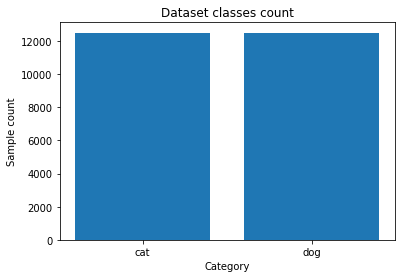

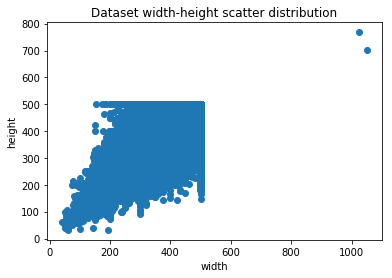

In [7]:
classes, count_info, width_info, height_info = analysis_dataset(NEW_TRAIN_DIR)
draw_dataset(classes, count_info, width_info, height_info)

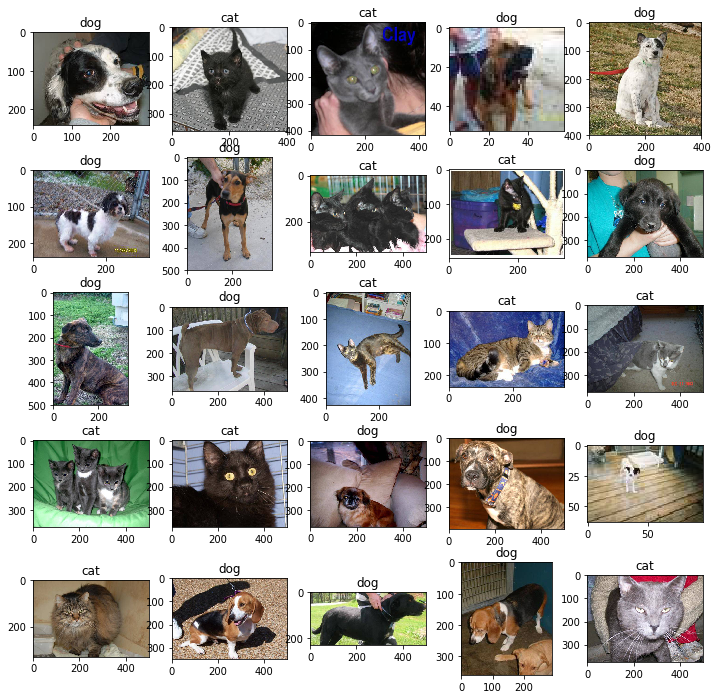

In [12]:
look_dataset(TRAIN_DIR,5)
plt.show()